# Data cleaning

## Setup

In [782]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rootpath
import re
import qgrid
import glob

# Set root path for project
path = rootpath.detect()

# Read in data
# Use list comprehension to read in all files
# Cleansers
## Oily skin
df_cleanser_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_face-wash_oilyskin_pg*.csv")], ignore_index=True)
## Dry skin
df_cleanser_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_face-wash_dryskin_pg*.csv")], ignore_index=True)
## Normal skin
df_cleanser_normal = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_face-wash_normalskin_pg*.csv")], ignore_index=True)

# Toners
df_toner_normal = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_toner_normalskin_pg1.csv")], ignore_index=True)
df_toner_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_toner_dryskin_pg1.csv")], ignore_index=True)
df_toner_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/cleansers_toner_oilyskin_pg1.csv")], ignore_index=True)

# Treatments and serums
df_serum_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/treatments and serums_face serum_oilyskin.csv")], ignore_index=True)
df_serum_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/treatments and serums_face serum_dryskin.csv")], ignore_index=True)

# Moisturizers
df_moist_dry = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/moisturizer_face moisturizer_dryskin_pg*.csv")], ignore_index=True)
df_moist_oily = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/moisturizer_face moisturizer_oilyskin_pg*.csv")], ignore_index=True)
df_moist_normal = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/moisturizer_face moisturizer_normalskin_pg*.csv")], ignore_index=True)

# Generics
df_generics = pd.concat([pd.read_csv(file, index_col=0) for file in glob.glob(f"{path}/data/generics.csv")], ignore_index=True)


## Examine data

In [994]:
# Merge data into one df
# - pd concat does a copy
df_raw = pd.concat([df_cleanser_oily,df_cleanser_dry,df_cleanser_normal,
                          df_toner_normal, df_toner_dry, df_toner_oily,
                         df_serum_oily,df_serum_dry, df_moist_dry,
                          df_moist_normal, df_moist_dry, df_generics], axis=0)

In [ ]:
df_raw.shape

In [784]:
df_raw.head()

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
0,cleanser,face wash,oily,Philosophy,The Microdelivery Exfoliating Facial Wash,8.0 oz,Price\n$29.00,Daily exfoliation is vital to healthy-looking ...,"Aqua/Water/Eau, Solum Diatomeae/Diatomaceous E...",4.5,91%,812 Reviews,https://www.ulta.com/microdelivery-exfoliating...,1.0
1,cleanser,face wash,oily,Murad,AHA/BHA Exfoliating Cleanser,Size 6.75 oz|,Price\n$40.00,Featuring limited-edition Hydration packaging ...,"Water (Aqua), Sodium Laureth Sulfate, Cocamido...",4.6,93%,267 Reviews,https://www.ulta.com/ahabha-exfoliating-cleans...,1.0
2,cleanser,face wash,oily,CeraVe,Hydrating Facial Cleanser,8.0 oz,Price\n$13.49,"Developed with dermatologists, the CeraVe Hydr...","Purified Water, Glycerin, Behentrimonium Metho...",4.2,85%,700 Reviews,https://www.ulta.com/hydrating-facial-cleanser...,1.0
3,cleanser,face wash,oily,Peter Thomas Roth,Anti-Aging Cleansing Gel,Size 8.5 oz|,Price\n$39.00,"Oil-free, anti-wrinkle technology helps to cla...","Water/Aqua/Eau, Sodium Laureth Sulfate, Cocami...",4.5,91%,330 Reviews,https://www.ulta.com/anti-aging-cleansing-gel?...,1.0
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75 oz,Price\n$40.00,Murad Essential-C Cleanser is a patented antio...,"Water (Aqua), Cocamidopropyl Betaine, Disodium...",4.6,94%,272 Reviews,https://www.ulta.com/essential-c-cleanser?prod...,1.0


In [607]:
df_generics

,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page
0,face moisturizer,oily,Walgreens,Night facial moisturizing lotion,3,11.99,NaN,"Purified Water, Cetearyl Alcohol, Glycerin, Ca...",2.5,NaN,4,https://www.walgreens.com/store/c/walgreens-ni...,NaN
1,face moisturizer,normal,Walgreens,Night facial moisturizing lotion,3,11.99,NaN,"Purified Water, Cetearyl Alcohol, Glycerin, Ca...",2.5,NaN,4,https://www.walgreens.com/store/c/walgreens-ni...,NaN
2,face wash,normal,Walgreens,Gentle Skin Cleanser,16,8.79,NaN,"Water, Cetyl Alcohol, Propylene Glycol, Sodium...",4.1,NaN,14,https://www.walgreens.com/store/c/walgreens-ge...,NaN
3,face wash,dry,Walgreens,Gentle Skin Cleanser,16,8.79,NaN,"Water, Cetyl Alcohol, Propylene Glycol, Sodium...",4.1,NaN,14,https://www.walgreens.com/store/c/walgreens-ge...,NaN


In [984]:
qgrid.show_grid(df_raw, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 100})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [785]:
df_raw.describe()

,ratings,page
count,2262.00000,2437.000000
mean,4.37038,1.738613
std,0.40273,0.903491
min,1.00000,1.000000
25%,4.20000,1.000000
50%,4.40000,1.000000
75%,4.60000,2.000000
max,5.00000,4.000000


In [786]:
df_raw['use_subcategory'].unique()

array(['face wash', 'toner', 'face serum', 'face moisturizer',
       'toothpaste'], dtype=object)

In [787]:
df_raw.dtypes

use_category        object
use_subcategory     object
skintype            object
brand               object
product             object
size                object
price               object
details             object
ingredients         object
ratings            float64
perc_respondrec     object
total_reviews       object
link                object
page               float64
dtype: object

## Data cleaning

### Size

In [995]:
# Check for input errors
pd.options.display.max_rows = 4000 # 2447 rows
#df_raw['size'].unique

In [996]:
# Drop size rows with NaN
df_raw.dropna(subset = ['size'], inplace=True)
# Check
#df_raw['size'].isnull().sum()

In [997]:
# Drop rows without size information in oz
#  Ct is informative but no way to convert to oz so remove
#  NaN
df_raw=df_raw[~df_raw['size'].str.contains('ounce|ct|Original|Rose Petal|Hydrating Clearing Jelly+|Hydrating Jelly|Imperfections|Calm',
                                           na=False)]

In [998]:
# Replace cells with |Item to blank since these also contain size information
# - Use fillna to replace NaN strings back to orginal values
df_raw['size'] = df_raw['size'].str.replace('(\|Item \d{7})','').fillna(df_raw['size'])

In [999]:
# Remove rows that contain item in them
df_raw=df_raw[~df_raw['size'].str.contains('Item', na=False)]

In [1000]:
# Replace 'size' and 'oz|' with blanks and convert size to float
df_raw['size'] = df_raw['size'].str.replace('Size | oz| oz\||\|','').fillna(df_raw['size']).astype('float64')

In [1001]:
# Remove rows that contain Travel Size items in them
df_raw=df_raw[~df_raw['product'].str.contains('Travel Size', na=False)]

### Price

In [1002]:
# Remove text and convert price to numeric 
df_raw['price']=df_raw['price'].str.replace('''Price\\n\$|Sale Price\\n\$\d*\.\d*\\nOriginal Price\\n\$|
                                      Price\\n\$|\\nMarket Value\\n\(\$39 value\)|
                                      |\\nMarket Value\n\(\$58 value\)|
                                      |\\nMarket Value\\n\(\$54 value\)''',
                                   '').fillna(df_raw['price']).astype('float64')

### Reviews

In [1003]:
# Drop total_reviews rows with NaN
df_raw.dropna(subset = ['total_reviews'], inplace=True)

In [1012]:
# Remove review text and convert to integer
df_raw['total_reviews'] = df_raw['total_reviews'].str.replace(' Reviews| Review','') \
                                                 .fillna(df_raw['total_reviews'])
df_raw['total_reviews'] = pd.to_numeric(df_raw['total_reviews'],errors='coerce',downcast='signed') \
                                      .fillna(df_raw['total_reviews']) \
                                      .astype(int)

### Ingredients

In [728]:
# Remove rows with no ingredient information
df_cleansers.dropna(subset=['ingredients'], inplace = True)

# # Remove incorrect ingredients
df_cleansers.drop(df_cleansers[df_cleansers['ingredients'].str.contains('This item is not eligible for coupon discounts', na=False)].index, inplace=True)





### Regex

In [159]:
pd.set_option('display.max_seq_items', 2000)
pd.set_option('display.max_rows', 2000)

In [758]:
# Get the first ingredient after splitting into strings to figure out water regex
# Change string of ingredients into a list containing a string for each ingredient, split by the following characters
df2.ingredients = df2.ingredients.str.split(r',|\\n') # |\.
## NEED TO FIX PERIOD B/C AFFECTS ACTIVE INGREDIENTS

# strip whitespace from around each ingredient
df2.ingredients = [[ingredient.strip().lower() for ingredient in product] for product in df2.ingredients]
df2 = df2.explode('ingredients')

# Replace all rows that contain string water with water, get rid of alternative spellings
df2['ingredients'] = np.where(df2['ingredients'].str.contains('water'), 'water', df2['ingredients'])  
# Same for fragrance
df2['ingredients'] = np.where(df2['ingredients'].str.contains('fragrance'), 'fragrance', df2['ingredients'])  
        
test = df2['ingredients'].unique()

# Create column for presence of ingredient in a product (excluding absences and does not account for all possible ingredients)
df2['ingred_value'] = 1
df2['skintype_value'] = 1 
df2['producttype_value'] = 1 





#df2.ingredients[:10]
# Replace strings that contain 'water' with water
# for product in df2.ingredients:
#     for ingredientlist in product:
#         for ingredient in ingredientlist:
#             if 'water' in ingredient:
#                 ingredient = ingredient.replace('^.*(water).*','water')
#                 product[ingredientlist][ingredient] = ingredient.replace(ingredient,'water')
#df2.ingredients[:10]
# for product in df2.ingredients:
#     for ingredientlist in product:
#             if 'water' in ingredientlist:
#                 product[ingredientlist] = ingredientlist.replace(ingredientlist,'water')
#         for ingredient in ingredientlist:
#             if 'water' in ingredient:
#                 df2.ingredients[i] = 'water'
#df2.ingredients.iloc[1]#[0]
#df2.ingredients = [product.split(',|\\n|\.') for product in df2.ingredients]
#df_cleansers['ingredients'] = [[ingredient for ingredient in str(product).split(', |\\n|\.')] for product in df_cleansers.ingredients]
#df2.ingredients=[[ingredient.split(', ') for ingredient in product] for product in df2.ingredients]
# Separate ingredient lists into lists of strings for each product
#test = [[ingredient.lower() for ingredient in product] for product in test] # df_cleansers.ingredients
#df_cleansers.ingredients = [[ingredient.lower() for ingredient in product] for product in df_cleansers.ingredients]
#df2.ingredients.str.split(',')
#test[:5]
# Look at first ingredient of each product for reformatting water
#test = [ingredient[0] for ingredient in df_cleansers.ingredients]
#np.unique(test)

# test2 = [ingredient.str.replace('\(([^)]+)\)| \/ aqua \/ eau|\/aqua\/eau|\\\\aqua\\\\eau|' \
#                                '\(mineral spring water\)| purified| \(solvent\/diluent\)|' \
#                                ' \(water/eau\)|') for ingredient in df_cleansers.ingredients]
# test2 = [[ingredient.replace('.*(water).*', '') for ingredient in product] for product in df2.ingredients]
# test2
#df2.ingredients[:10]
# test1 = df2.ingredients.iloc[1]
# test3 = test1[0].replace('.*(water).*', '')
# test3
# for i, item in enumerate(list_of_strings):
#     if "super" in item:
#         list_of_strings[i] = "superintendent"
#np.unique(test2)
#df_cleansers.ingredients.iloc[0]
#df_cleansers['ingredients']
#df_cleansers['ingredients'].unique()


# Percent responded would recommend
# Remove percent symbol
# df_cleanser_oily['perc_respondrec'] = df_cleanser_oily['perc_respondrec'].str.replace('\%', '').astype(int)
# df_cleanser_oily['perc_respondrec'].head()

# Total Reviews #
# Remove whitespace and 'reviews'
# df_cleanser_oily['total_reviews'] = df_cleanser_oily['total_reviews'].str.replace(' Reviews', '').astype(int)
# df_cleanser_oily['total_reviews'].head()
df2.head()

,use_category,use_subcategory,skintype,brand,product,size,price,details,ingredients,ratings,perc_respondrec,total_reviews,link,page,ingred_value,skintype_value,producttype_value
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75,40.0,Murad Essential-C Cleanser is a patented antio...,water,4.6,94%,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,1,1,1
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75,40.0,Murad Essential-C Cleanser is a patented antio...,cocamidopropyl betaine,4.6,94%,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,1,1,1
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75,40.0,Murad Essential-C Cleanser is a patented antio...,disodium laureth sulfosuccinate,4.6,94%,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,1,1,1
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75,40.0,Murad Essential-C Cleanser is a patented antio...,glycerin,4.6,94%,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,1,1,1
4,cleanser,face wash,oily,Murad,Essential-C Cleanser,6.75,40.0,Murad Essential-C Cleanser is a patented antio...,butylene glycol,4.6,94%,272,https://www.ulta.com/essential-c-cleanser?prod...,1.0,1,1,1


In [754]:
df2.shape

(17173, 21)

In [759]:
# Add sequence for each ingredient in product
df2['ingred_order'] = df2.groupby('product')['ingred_value'].rank(method="first", ascending=True)

# Get max value of sequence and store in separate df
df2temp = df2.groupby('product')['ingred_order'].max().reset_index()
# Plus 1 so that last ingredient is 1 when take difference of max and ingredient order
# Otherwise zero will indicate that last ingredient isn't present
df2temp['ingred_order'] = df2temp['ingred_order']+1
df2temp=df2temp.rename(columns={"ingred_order":"ingred_ordinal_max"})


df2temp.head(n=10)        
#df2.head(n=10)

,product,ingred_ordinal_max
0,''Buffet'' + Copper Peptides 1%,50.0
1,100% Plant-Derived Squalane,3.0
2,24-7 Moisture Hydrating Day & Night Cream,55.0
3,3% Glycolic Solutions Cleanser,17.0
4,50 MG CBD Moisturizer,21.0
5,81% Organic Hydrating Day Cream,51.0
6,82% Organic Softening Cleanser,22.0
7,A Perfect World Antioxidant Moisturizer with W...,65.0
8,A Perfect World SPF 40 Age-Defense Oil Free Mo...,66.0
9,A.G.E. Less Everyday Moisturizer,40.0


In [760]:
# Merge with original DF
df2=pd.merge(df2,df2temp,on='product')
#df2.head()
df2.shape

(17173, 19)

In [761]:
# Take difference of ordinal max from ingredient order to get ordinal values for ingredients
df2['ingred_ordinal'] = df2["ingred_ordinal_max"] - df2["ingred_order"]
# Scale by the ordinal max so products with different numbers of ingredients are on the same scale
# minus 1 because added 1 before so last ingredient would not be zero
df2['ingred_ordinal_sc'] = df2['ingred_ordinal']/(df2["ingred_ordinal_max"]-1)
df2.head(n=45)
df2.shape

(17173, 21)

In [221]:
df2.head()

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

#### Pivot long to wide

In [762]:
df3 = df2.pivot_table(index=['product','skintype','skintype_value','use_subcategory','producttype_value'],
                    columns='ingredients',
                    values='ingred_ordinal_sc',
                     aggfunc='max',
                     fill_value=0)

In [763]:
# Put index values back as columns
df3.reset_index(inplace=True)

In [765]:
df3.head()
df3.shape

(517, 3248)

In [240]:
# Shows all unique ingredients, use to find errors in input
print (df3.columns.tolist())

['', '(thyme) leaf extract', '* aloe barbadensis (aloe vera) leaf juice', '* cymbopogon schoenanthus (lemongrass) oil', '* potassium cocotte (saponified coconut oil*)', '* rosmarinus officials (rosemary) leaf oil', '* tocopherol (vitamin e). *certified usda organic', '*95% naturally derived/dérivé naturellement.', '*avena sativa (oat) kernel extract', '*baptisia tinctoria root extract', '*calendula officinalis flower extract', '*citronellol', '*geraniol', '*limonene', '*linalool. *natural constituent of essential oils listed.', '*nepeta cataria extract', '*rubus idaeus (raspberry) leaf extract', '*stellaria media (chickweed) extract', '1', '10-hydroxydecanoic acid', '100% natural ingredients: sodium cocoate**', '100% natural ingredients:\xa0sodium cocoate**', '2 hexanediol', '2-hexanediol', '^limonene', '^linalool.\xa0 ^natural constituent of essential oils listed.', 'abies sibirica oil', 'acacia concinna fruit extract', 'acacia decurrens (mimosa) flower wax', 'acacia senegal gum', 'ac

In [766]:
# Pivot wider based on skintype
df4 = df3.pivot_table(index='product',
                    columns='skintype',
                    values='skintype_value',
                     aggfunc='max',
                     fill_value=0)

In [541]:
df4.head()

skintype,dry,normal,oily
product,,,
''Buffet'' + Copper Peptides 1%,1,0,0
+Retinol Vita C Power Serum Firming + Brightening Treatment,0,0,1
100% Plant-Derived Squalane,1,0,1
1000 Roses Cleansing Foam,1,0,0
3 Step Mini Skin Care Set,1,0,0


In [767]:
# Put index values back as columns
df4.reset_index(inplace=True)

In [248]:
print (df4.columns)

Index(['product', 'dry', 'normal', 'oily'], dtype='object', name='skintype')


In [768]:
# merge df for one hot encoding for skintypes
df5=pd.merge(df3,df4,on='product')

In [619]:
df5.head()

,product,skintype,skintype_value,use_subcategory,producttype_value,,(euterpe oleracea/euterpe precatoria/theobroma grandiflorum) fruit extract,(thyme) leaf extract,* aloe barbadensis (aloe vera) leaf juice,* cymbopogon schoenanthus (lemongrass) oil,...,zingiber officinale (ginger) root,zingiber officinale (ginger) root extract,zingiber officinale (ginger) root extract *,zingiber officinale (ginger) root oil*,zingiber officinale root,zostera marina extract.,zymomonas ferment extract,dry,normal,oily
0,''Buffet'' + Copper Peptides 1%,dry,1,face serum,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,+Retinol Vita C Power Serum Firming + Brighten...,oily,1,face serum,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,100% Plant-Derived Squalane,dry,1,face serum,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
3,100% Plant-Derived Squalane,oily,1,face serum,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1
4,1000 Roses Cleansing Foam,dry,1,face wash,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


In [769]:
# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5.drop(columns=['skintype','skintype_value'], inplace=True)
df5.head()

,product,use_subcategory,producttype_value,,* limonene.*\n\n*linalool and limonene have not been added to the formula,***frgrance,**alchemilla vulgaris leaf extract,**althaea officinalis root extract,**equisetum arvense leaf extract,**plantago lanceolata leaf extract,...,zingiber officinale (ginger) root extract*,zingiber officinale (ginger) root oil,zingiber officinale (ginger) root oil*,zingiber officinale root,zingiber offinale (ginger) root extract,zymomonas ferment extract,all,dry,normal,oily
0,''Buffet'' + Copper Peptides 1%,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,100% Plant-Derived Squalane,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
2,100% Plant-Derived Squalane,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
3,24-7 Moisture Hydrating Day & Night Cream,face moisturizer,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,3% Glycolic Solutions Cleanser,face wash,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [770]:
# Pivot wider based on use_subcategory
df4_1 = df3.pivot_table(index='product',
                    columns='use_subcategory',
                    values='producttype_value',
                     aggfunc='max',
                     fill_value=0)

In [622]:
df4_1.head()

use_subcategory,face serum,face wash,toner
product,,,
''Buffet'' + Copper Peptides 1%,1,0,0
+Retinol Vita C Power Serum Firming + Brightening Treatment,1,0,0
100% Plant-Derived Squalane,1,0,0
1000 Roses Cleansing Foam,0,1,0
3 Step Mini Skin Care Set,0,0,1


In [771]:
# Put index values back as columns
df4_1.reset_index(inplace=True)

In [772]:
# merge df for one hot encoding for skintypes
df5_1=pd.merge(df5,df4_1,on='product')

In [551]:
df5_1.head()

,product,use_subcategory,producttype_value,,(euterpe oleracea/euterpe precatoria/theobroma grandiflorum) fruit extract,(thyme) leaf extract,* aloe barbadensis (aloe vera) leaf juice,* cymbopogon schoenanthus (lemongrass) oil,* limonene.*\n\n*linalool and limonene have not been added to the formula,* potassium cocotte (saponified coconut oil*),...,zingiber officinale (ginger) root oil*,zingiber officinale root,zostera marina extract.,zymomonas ferment extract,dry,normal,oily,face serum,face wash,toner
0,''Buffet'' + Copper Peptides 1%,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,1,0,0
1,+Retinol Vita C Power Serum Firming + Brighten...,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,0,0
2,100% Plant-Derived Squalane,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1,1,0,0
3,100% Plant-Derived Squalane,face serum,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,1,1,0,0
4,1000 Roses Cleansing Foam,face wash,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0


In [773]:
# Get rid of skintype and skintype_value columns now that they're one hot encoded
df5_1.drop(columns=['use_subcategory','producttype_value'], inplace=True)
#df5_1.head()
df5_1.shape

(517, 3253)

In [774]:
# Extract distinct rows since no longer need product duplicates
df5_1=df5_1.drop_duplicates(subset = ["product"])
df5_1.head()
df5_1.shape

(413, 3253)

In [775]:
df5_1.loc[df5_1['product']=='Gentle Skin Cleanser']

,product,,* limonene.*\n\n*linalool and limonene have not been added to the formula,***frgrance,**alchemilla vulgaris leaf extract,**althaea officinalis root extract,**equisetum arvense leaf extract,**plantago lanceolata leaf extract,**rosa damascena flower extract,**spiraea ulmaria flower extract,...,zymomonas ferment extract,all,dry,normal,oily,face moisturizer,face serum,face wash,toner,toothpaste
207,Gentle Skin Cleanser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,1,0,0,0,1,0,0


In [745]:
# Add total ingredients column
tempdf = df2[['ingred_ordinal_max', 'product']]
tempdf = tempdf.rename(columns={'ingred_ordinal_max':'total_ingred'})
# Remove extra 1 added for ordinal encoding
tempdf['total_ingred']=tempdf['total_ingred']-1
# Remove duplicate rows
tempdf=tempdf.drop_duplicates(subset = ["product"])
#tempdf.head()
# Merge df
df6 = df5_1.merge(tempdf, how = 'left', on = 'product')
df6.head()

,product,,* limonene.*\n\n*linalool and limonene have not been added to the formula,***frgrance,**alchemilla vulgaris leaf extract,**althaea officinalis root extract,**equisetum arvense leaf extract,**plantago lanceolata leaf extract,**rosa damascena flower extract,**spiraea ulmaria flower extract,...,all,dry,normal,oily,face moisturizer,face serum,face wash,toner,toothpaste,total_ingred
0,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,49.0
1,100% Plant-Derived Squalane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,1,0,0,0,2.0
2,24-7 Moisture Hydrating Day & Night Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,54.0
3,3% Glycolic Solutions Cleanser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,16.0
4,50 MG CBD Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,1,0,0,0,0,20.0


In [746]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df6[['total_ingred_sc']] = scaler.fit_transform(df6[['total_ingred']])
df6.head()

,product,,* limonene.*\n\n*linalool and limonene have not been added to the formula,***frgrance,**alchemilla vulgaris leaf extract,**althaea officinalis root extract,**equisetum arvense leaf extract,**plantago lanceolata leaf extract,**rosa damascena flower extract,**spiraea ulmaria flower extract,...,dry,normal,oily,face moisturizer,face serum,face wash,toner,toothpaste,total_ingred,total_ingred_sc
0,''Buffet'' + Copper Peptides 1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,49.0,0.213636
1,100% Plant-Derived Squalane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,0,0,2.0,0.000000
2,24-7 Moisture Hydrating Day & Night Cream,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,54.0,0.236364
3,3% Glycolic Solutions Cleanser,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,16.0,0.063636
4,50 MG CBD Moisturizer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,20.0,0.081818


## SVD

In [747]:
## FIT SVD FOR SPARSE DATA
# Load libraries

from sklearn.decomposition import TruncatedSVD
#from scipy.sparse import csr_matrix
import seaborn as sns

# Create feature ready df
features = df6.copy().drop(['total_ingred'],axis=1).set_index('product')

In [557]:
features.shape

(367, 2843)

In [778]:
# Create a TSVD
tsvd = TruncatedSVD(n_components=100)

# Conduct TSVD on sparse matrix
X_sparse_tsvd = tsvd.fit(features).transform(features)
df7 = pd.DataFrame(X_sparse_tsvd)

In [777]:
# Sum of first three components' explained variance ratios
dat_plot = pd.DataFrame(tsvd.explained_variance_ratio_[0:200])
tsvd.explained_variance_ratio_[0:100].sum()

0.7216208857587217

In [451]:
len(dat_plot)

125

In [441]:
# Eigenvalues
tsvd.explained_variance_

array([0.1837389 , 0.36298439, 0.33308637, 0.25325717, 0.21017713,
       0.18003669, 0.15449495, 0.13563904, 0.12890032, 0.12637338,
       0.11109831, 0.10867418, 0.09740543, 0.09671291, 0.09551439,
       0.09303635, 0.08918521, 0.08845115, 0.08529319, 0.08328756,
       0.08136854, 0.07814838, 0.07706576, 0.07507417, 0.07212604,
       0.07175233, 0.07055295, 0.0671992 , 0.06681318, 0.06556072,
       0.06150146, 0.06098436, 0.0601717 , 0.06001009, 0.05839092,
       0.05610916, 0.05579048, 0.0544885 , 0.05276866, 0.05188954,
       0.05089707, 0.04950202, 0.04856195, 0.04819334, 0.04785062,
       0.04656478, 0.04534316, 0.04478381, 0.04449258, 0.04376333,
       0.04280615, 0.04263771, 0.04141139, 0.04066093, 0.0397463 ,
       0.0394692 , 0.03861206, 0.0382935 , 0.03767547, 0.03658265,
       0.03606214, 0.03563213, 0.03526112, 0.03462202, 0.03392248,
       0.03371947, 0.03339821, 0.03280109, 0.03192367, 0.03169268,
       0.03138058, 0.03057876, 0.03052861, 0.02987992, 0.02928

In [442]:
# Plot 
ax = sns.barplot(x="day", y="tsvd.explained_variance_ratio_[0:2]", data=dat_plot)b

SyntaxError: invalid syntax (<ipython-input-442-7d45b0bd48ed>, line 2)

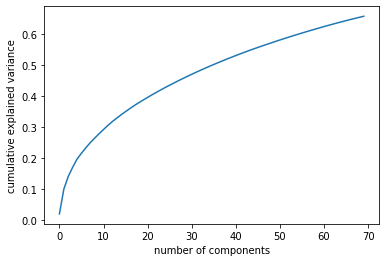

In [560]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(tsvd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [452]:
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,1.079488,0.166756,-0.664177,0.435997,-0.666657,-1.077805,0.834631,-0.382261,-1.179065,0.095714,...,0.385104,0.402839,0.257540,0.098062,0.021444,0.118731,0.110133,-0.109568,-0.105931,0.151978
1,1.843619,-0.852818,-0.414215,-0.034749,-0.127197,-0.682777,0.165807,0.186618,-0.032139,-0.188757,...,0.017583,-0.001201,-0.108024,0.006224,-0.046372,-0.039557,-0.049626,0.002531,-0.115787,0.014859
2,1.536162,0.045772,-0.837378,0.312137,0.141460,-0.153411,0.310379,-0.455851,-0.456844,-0.207281,...,-0.070388,-0.127883,0.061339,0.051660,0.015898,0.018430,0.045841,-0.009908,-0.032223,0.005806
3,1.756331,-0.617205,-0.139568,0.170658,0.078240,0.218845,-0.084785,0.263455,-0.160521,-0.386417,...,-0.038662,0.050597,0.097747,-0.005082,-0.104133,-0.016692,-0.010874,0.088196,-0.151884,0.011179
4,1.310773,-0.597265,0.141789,-0.623326,0.255439,-0.126778,0.205320,0.121826,0.034829,0.174755,...,0.023380,-0.071698,0.002032,0.027034,0.005684,0.039237,0.032055,-0.028730,-0.079167,0.065853


In [779]:
# Add product info back into SVD df results
df7['product']=df6['product']
# Extract OG product info
product_details=df2[['product','brand','use_subcategory','price','size','ratings','total_reviews','link']].copy()
# Rename
product_details=product_details.rename(columns={'use_subcategory':'product_type'})
# price per oz
product_details['price_oz']=(product_details['price']/product_details['size']).round(2)
# Merge product deets with SVD results
df8 = product_details.merge(df7, how = 'left', on = 'product')
# drop duplicates
df8=df8.drop_duplicates(subset = ["product"])
df8.head(n=5)

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,90,91,92,93,94,95,96,97,98,99
0,Essential-C Cleanser,Murad,face wash,40.0,6.75,4.6,272,https://www.ulta.com/essential-c-cleanser?prod...,5.93,1.350766,...,0.056951,0.047798,-0.156842,-0.037621,-0.157617,-0.092416,-0.032639,-0.084002,-0.034075,-0.011239
72,Squalane Cleanser,The Ordinary,face wash,7.9,1.00,4.1,332,https://www.ulta.com/squalane-cleanser?product...,7.90,1.088917,...,0.065170,0.034937,-0.041612,-0.044239,-0.060830,0.012184,0.049911,0.061007,-0.005368,-0.069142
112,Purity Made Simple One-Step Facial Cleanser,Philosophy,face wash,25.0,8.00,4.7,8599,https://www.ulta.com/purity-made-simple-one-st...,3.12,1.227256,...,0.141519,-0.040939,-0.045697,-0.008907,-0.150333,0.047031,-0.081883,-0.024413,0.076629,-0.042881
180,Clearing Skin Wash,Dermalogica,face wash,39.0,8.40,4.5,1010,https://www.ulta.com/clearing-skin-wash?produc...,4.64,0.963208,...,0.011895,0.044375,0.053649,0.061664,-0.113422,0.014662,-0.087776,-0.042968,-0.089757,-0.003197
254,Checks and Balances Frothy Face Wash,Origins,face wash,24.0,5.00,4.7,2452,https://www.ulta.com/checks-balances-frothy-fa...,4.80,1.673968,...,-0.015504,-0.044334,0.089334,0.043506,-0.016250,-0.026875,0.019934,-0.131198,0.057694,-0.008807


In [780]:
# Export data for analysis
df8.to_csv(f"{path}/data/data_clean.csv",index=True)
df8.shape

(413, 109)

In [752]:
df8.loc[df8['product_type']=='toothpaste']

,product,brand,product_type,price,size,ratings,total_reviews,link,price_oz,0,...,190,191,192,193,194,195,196,197,198,199
17129,Sensitivity Whitening Plus Scope Toothpaste Mi...,Crest,toothpaste,NaN,NaN,4.7,<NA>,https://www.walgreens.com/store/c/crest-sensit...,NaN,0.923008,...,-0.018721,-0.006079,-0.006718,0.030224,-0.000054,-0.000381,-0.047090,0.048847,-0.040650,0.042781
17146,Peppermint Toothpaste Peppermint,Dr. Bronner's,toothpaste,NaN,NaN,4.8,<NA>,https://www.walgreens.com/store/c/dr.-bronner'...,NaN,0.514171,...,-0.016996,0.170271,0.076920,-0.004425,-0.068206,-0.018829,0.191683,-0.044516,0.037729,0.088809
17160,Gentle Mint Fluoride Toothpaste Mint,Biotene,toothpaste,NaN,NaN,3.9,<NA>,https://www.walgreens.com/store/c/biotene-gent...,NaN,0.852685,...,-0.083440,0.013792,0.009967,0.023270,-0.010453,0.063252,0.022849,0.084390,-0.006966,-0.006731
